In [3]:
from scm_irl.env.scm_irl_env import ScmIrlEnv
from sllib.conversions.geo_conversions import north_east_to_lat_lon, mps2knots, lat_lon_to_north_east
import numpy as np
from hydra.experimental import initialize_config_dir, compose

path = "/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_2a66ceaf61"
#path = "/home/rolando/Documents/DTU/SCMarine/scm_irl/data/raw/scenario_01e88fc6af"
#path = "/home/rolando/Documents/DTU/SCMarine/scm_irl/data/raw/scenario_3cb9cf2af3"
#path = "/home/rolando/Documents/DTU/SCMarine/scm_irl/data/raw/scenario_121252efbd"
#215811000
#219016555
#219023834
#, mmsi=215811000
#env = ScmIrlEnv(path, mmsi=215811000, awareness_zone = [500, 2000, 1000, 1000])
#env = ScmIrlEnv(path, mmsi=215811000, awareness_zone = [500, 1000, 500, 500], render_mode="human", resolution=1)
#env = ScmIrlEnv(path, awareness_zone = [300, 600, 300, 300], render_mode="human", resolution=1)
#env = ScmIrlEnv(path, mmsi=215811000, awareness_zone = [300, 600, 300, 300], render_mode="human", resolution=1 , start_time_reference=1577905000.0)

# Load the hydra config (config_path="../scm_irl/conf", config_name="train_rl")
with initialize_config_dir(config_dir="/home/rolando/Documents/DTU/SCMarine/scm_irl/scm_irl/conf"):
    cfg = compose(config_name="train_rl.yaml")

# Access the config values
print(cfg)

env = ScmIrlEnv(cfg, path, mmsi=215811000, awareness_zone = [300, 600, 300, 300], render_mode="human", resolution=1)

#env = ScmIrlEnv(path, mmsi=219002731, awareness_zone = [500, 1000, 500, 500], render_mode="human", resolution=10)

#env.step([2,1])
env.mmsi

print(env.get_vessel_metadata())



print(env.agent_state)

timestep = env.timestep

env.reset()


#while not (env.truncated or env.terminate):
for i in range(100):
    timestep = env.timestep
    action = env.get_action_from_vessel(timestep)
    print(f"action: {action}")
    #action = (action[0], -0.5)
    agent_state, reward, terminate, truncated, info = env.step(action)

    print(f"agent_: {agent_state}")
    print(reward)


    #print(action)
    #print(ret)

#     # create random action
#     # action = env.action_space.sample()
#     # # take action
#     # env.step(action)
#     env.step([2.0055,i])

env.close()

/home/rolando/anaconda3/envs/scm/lib/python3.11/site-packages/hydra/experimental/initialize.py:116: UserWarning: hydra.experimental.initialize_config_dir() is no longer experimental. Use hydra.initialize_config_dir().
  deprecation_warning(message=message)
/home/rolando/anaconda3/envs/scm/lib/python3.11/site-packages/hydra/experimental/initialize.py:118: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  self.delegate = real_initialize_config_dir(
/home/rolando/anaconda3/envs/scm/lib/python3.11/site-packages/hydra/experimental/compose.py:25: UserWarning: hydra.experimental.compose() is no longer experimental. Use hydra.compose()
  deprecation_warning(message=message)
/home/rolando/anaconda3/envs/scm/lib/python3.11/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'train_rl.yaml': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/defa

{'env': {'seamarks': {'vessel': {'value': 1, 'color': [0, 0, 0], 'size': 1.0}, 'Unknown': {'value': 2, 'color': [96, 96, 96], 'size': 1.0}, 'way': {'value': 3, 'color': [255, 255, 0]}, 'beacon_lateral': {'value': 4, 'color': [128, 0, 128], 'size': 1.0}, 'light_minor': {'value': 5, 'color': [165, 42, 42], 'size': 1.0}, 'bridge': {'value': 6, 'color': [128, 128, 128], 'size': 1.0}, 'buoy_special_purpose': {'value': 7, 'color': [255, 0, 255], 'size': 1.0}, 'buoy_cardinal': {'value': 8, 'color': [255, 255, 255], 'size': 1.0}, 'beacon_special_purpose': {'value': 9, 'color': [192, 192, 192], 'size': 1.0}, 'small_craft_facility': {'value': 10, 'color': [255, 215, 0], 'size': 1.0}, 'sea_area': {'value': 11, 'color': [255, 105, 180], 'size': 1.0}, 'mooring': {'value': 12, 'color': [128, 0, 0], 'size': 1.0}, 'rock': {'value': 13, 'color': [255, 140, 0], 'size': 1.0}, 'pile': {'value': 14, 'color': [153, 50, 204], 'size': 1.0}, 'obstruction': {'value': 15, 'color': [139, 69, 19], 'size': 1.0}, 'l

In [6]:
from scm_irl.env.scm_irl_env import ScmIrlEnv
from sllib.conversions.geo_conversions import north_east_to_lat_lon, mps2knots, lat_lon_to_north_east
import numpy as np
from hydra.experimental import initialize_config_dir, compose
import os

path = "/home/rolando/Documents/DTU/SCMarine/scm_irl/data/raw"

with initialize_config_dir(config_dir="/home/rolando/Documents/DTU/SCMarine/scm_irl/scm_irl/conf"):
    cfg = compose(config_name="train_rl.yaml")

# Access the config values


dict_scenarios = {}
for dir in os.listdir(path):
    if os.path.isdir(os.path.join(path, dir)):

        print(dir)
        mmsi = 1
        path_scenario = os.path.join(path, dir)
        scenario_id = dir.split("_")[-1]
        while mmsi is not None:
            #print(dict_scenarios)
            env = ScmIrlEnv(cfg, path_scenario, 
                            awareness_zone = [300, 600, 300, 300], 
                            render_mode="rgb_array", resolution=1, 
                            dict_scenarios=dict_scenarios)
            mmsi = env.mmsi
            if mmsi is not None:
                if scenario_id not in dict_scenarios:
                    dict_scenarios[scenario_id] = [mmsi]
                else:
                    dict_scenarios[scenario_id].append(mmsi)


        #print(env.get_vessel_metadata())
        #env.close()
    

print(dict_scenarios)

#env = ScmIrlEnv(cfg, path, mmsi=215811000, awareness_zone = [300, 600, 300, 300], render_mode="human", resolution=1)



/home/rolando/anaconda3/envs/scm/lib/python3.11/site-packages/hydra/experimental/initialize.py:116: UserWarning: hydra.experimental.initialize_config_dir() is no longer experimental. Use hydra.initialize_config_dir().
  deprecation_warning(message=message)
/home/rolando/anaconda3/envs/scm/lib/python3.11/site-packages/hydra/experimental/initialize.py:118: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  self.delegate = real_initialize_config_dir(
/home/rolando/anaconda3/envs/scm/lib/python3.11/site-packages/hydra/experimental/compose.py:25: UserWarning: hydra.experimental.compose() is no longer experimental. Use hydra.compose()
  deprecation_warning(message=message)
/home/rolando/anaconda3/envs/scm/lib/python3.11/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'train_rl.yaml': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/defa

scenario_2a66ceaf61
{}
mmsi: 215811000, start_time: 1577904600.0, end_time: 1577906100.0
{'2a66ceaf61': [215811000]}
no more mmsi to use in the scenario /home/rolando/Documents/DTU/SCMarine/scm_irl/data/raw/scenario_2a66ceaf61
scenario_97426ae0c2
{'2a66ceaf61': [215811000]}
no valid mmsi in the scenario /home/rolando/Documents/DTU/SCMarine/scm_irl/data/raw/scenario_97426ae0c2
scenario_121252efbd
{'2a66ceaf61': [215811000]}
no valid mmsi in the scenario /home/rolando/Documents/DTU/SCMarine/scm_irl/data/raw/scenario_121252efbd
scenario_3cb9cf2af3
{'2a66ceaf61': [215811000]}
mmsi: 248660000, start_time: 1577855400.0, end_time: 1577856900.0
{'2a66ceaf61': [215811000], '3cb9cf2af3': [248660000]}
mmsi: 538003902, start_time: 1577855400.0, end_time: 1577856900.0
{'2a66ceaf61': [215811000], '3cb9cf2af3': [248660000, 538003902]}
mmsi: 248518000, start_time: 1577855400.0, end_time: 1577856900.0
{'2a66ceaf61': [215811000], '3cb9cf2af3': [248660000, 538003902, 248518000]}
mmsi: 636014783, start_ti

In [16]:
import random

# Example values for start_time, end_time, and sampling_time
start_time = 100  # Starting number
end_time = 200 - 2     # Ending number
sampling_time = 10  # Step

# Generate a list of numbers from start_time to end_time with steps of sampling_time
time_steps = list(range(start_time, end_time, sampling_time))

# Select a random value from the list of time steps
random_time = random.choice(time_steps)

print(f"Random Time: {random_time}")

Random Time: 150


mmsi: 215811000, start_time: 1577904600.0, end_time: 1577906100.0


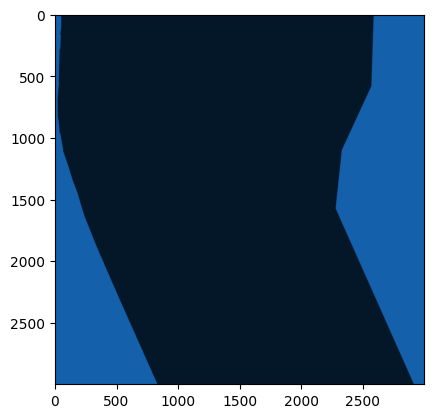

In [1]:
from scm_irl.env.scm_irl_env import ScmIrlEnv
import matplotlib.pyplot as plt
from scm_irl.utils.plot_scenario import plot_cropbox_area, modulate_color, cmap_seachart
path = "/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_2a66ceaf61"
#path = "/home/rolando/Documents/DTU/SCMarine/scm_irl/data/raw/scenario_01e88fc6af"
#path = "/home/rolando/Documents/DTU/SCMarine/scm_irl/data/raw/scenario_3cb9cf2af3"
#215811000
#219016555
#219023834
#, mmsi=215811000
env = ScmIrlEnv(path, mmsi=215811000, awareness_zone = [2000, 2000, 1500, 1500])

cmap = cmap_seachart()

plt.imshow(env.observation_matrix/60, cmap=cmap, vmin=0, vmax=1)

mmsi: 215811000, start_time: 1577904600.0, end_time: 1577906100.0


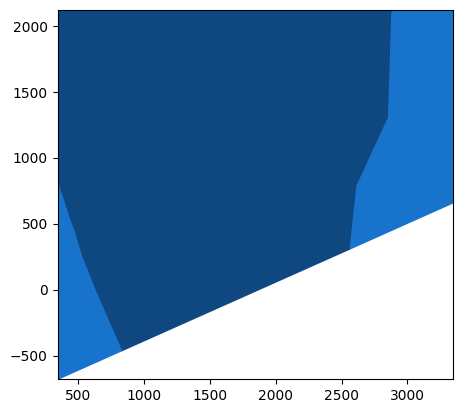

In [40]:
import matplotlib.patches as patches

from scm_irl.env.scm_irl_env import ScmIrlEnv
import matplotlib.pyplot as plt
from scm_irl.utils.plot_scenario import plot_cropbox_area, modulate_color, cmap_seachart
path = "/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_2a66ceaf61"
env = ScmIrlEnv(path, mmsi=215811000, awareness_zone = [2000, 2000, 1500, 1500])

depths_lands_inside = env._get_observation_matrix2()

crop_box = env._create_crop_box()
# plot the crop box



color = 'dodgerblue'
for depth in depths_lands_inside:
    polygon = patches.Polygon([(x[0], x[1]) for x in depth[0].exterior.coords], fill=True, color=modulate_color(color, 1- depth[1]/100))
    plt.gca().add_patch(polygon)


# get the limits of the polygons
x_min = min([x[0] for depth in depths_lands_inside for x in depth[0].exterior.coords])
x_max = max([x[0] for depth in depths_lands_inside for x in depth[0].exterior.coords])
y_min = min([x[1] for depth in depths_lands_inside for x in depth[0].exterior.coords])
y_max = max([x[1] for depth in depths_lands_inside for x in depth[0].exterior.coords])

# Set the axes limits to fit the plot
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.gca().set_aspect('equal', adjustable='box')

plt.show()

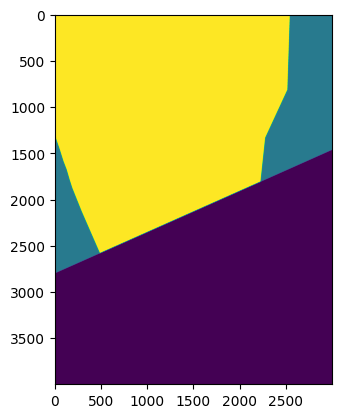

In [2]:
resolution = 1
from rasterio.features import rasterize
from rasterio.transform import from_origin

# Get the crop box
crop_box = env._create_crop_box(angle=90)

min_x, min_y, max_x, max_y = crop_box.bounds

# Determine the number of rows and columns of the raster
num_rows = int((max_y - min_y) / resolution)
num_cols = int((max_x - min_x) / resolution)

# Create a transformation matrix
transform = from_origin(min_x, max_y, resolution, resolution)
# Create the matrix
matrix = rasterize(depths_lands_inside, out_shape=(num_rows, num_cols), transform=transform, fill=-1)

plt.imshow(matrix, cmap='viridis')

In [1]:
import cv2
import numpy as np


matrix[-1,:] = (matrix[-2,:] + matrix[-3,:])/2
matrix[:,-1] = (matrix[:,-2] + matrix[:,-3])/2
matrix[0,:] = (matrix[1,:] + matrix[2,:])/2
matrix[:,0] = (matrix[:,1] + matrix[:,2])/2

# Convert the matrix to a floating-point image
matrix_float = matrix.astype(np.float32)

# Create a mask of missing values
mask = (matrix_float == -1).astype(np.uint8)

# Use inpaint to fill the missing values
matrix_filled = cv2.inpaint(matrix_float, mask, inpaintRadius=2, flags=cv2.INPAINT_NS)

plt.imshow(matrix_filled, cmap='viridis')

NameError: name 'matrix' is not defined

In [42]:
from shapely.geometry import Polygon
from shapely.ops import cascaded_union



crop_box = env._create_crop_box(angle=90)
#depths_lands_inside.append((crop_box, -1))


# # Create a union of all the polygons that intersect with the crop box
polygons_union = cascaded_union([polygon for polygon, depth in depths_lands_inside])

# # Create a polygon that represents the area of the crop box not covered by any polygon
empty_area = crop_box.difference(polygons_union)

# # Find the nearest polygon and its depth
# nearest_polygon, nearest_depth = min(depths_lands_inside, key=lambda item: item[0].distance(empty_area))

# # Create a new polygon that covers the empty area and assign it the depth of the nearest polygon
# new_polygon = (empty_area.geoms[1], nearest_depth)

# # Add the new polygon to the list of polygons and their depths
# depths_lands_inside.append(new_polygon)

from scipy.spatial import Voronoi
from shapely.geometry import MultiPoint
from shapely.ops import polygonize

# Get all the vertices of the polygons
vertices = [point for polygon, depth in depths_lands_inside for point in polygon.exterior.coords]

# Create a Voronoi diagram from the vertices
vor = Voronoi(vertices)

# Convert the Voronoi diagram to polygons
#voronoi_polygons = [Polygon(cell) for cell in vor.regions if cell and -1 not in cell]
voronoi_polygons = [Polygon(vor.vertices[cell]) for cell in vor.regions if cell and -1 not in cell]

# Intersect the Voronoi polygons with the empty area to create new polygons
new_polygons = [polygon.intersection(empty_area) for polygon in voronoi_polygons]

# Find the nearest polygon and its depth for each new polygon
for new_polygon in new_polygons:
    nearest_polygon, nearest_depth = min(depths_lands_inside, key=lambda item: item[0].distance(new_polygon))
    depths_lands_inside.append((new_polygon, nearest_depth))

/tmp/ipykernel_1791370/2921240431.py:11: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  polygons_union = cascaded_union([polygon for polygon, depth in depths_lands_inside])


In [50]:
depths_lands_inside[3]

# if polygon is empty, remove it
depths_lands_inside = [(polygon, depth) for polygon, depth in depths_lands_inside if polygon.area > 0]

depths_lands_inside

[(<POLYGON ((2856.682 1303.687, 2740.409 1051.719, 2617.007 784.413, 2588.801 ...>,
  50),
 (<POLYGON ((2566.363 309.45, 2588.801 520.195, 2617.007 784.413, 2740.409 105...>,
  20),
 (<POLYGON ((350.01 829.167, 356.958 789.848, 357.361 787.432, 356.853 775.956...>,
  20),
 (<POLYGON ((347.868 230.966, 347.868 19.963, 347.868 19.963, 347.868 230.966,...>,
  20),
 (<POLYGON ((347.868 -284.207, 347.868 19.963, 347.868 19.963, 347.868 -284.20...>,
  20),
 (<POLYGON ((347.868 443.773, 347.868 343.547, 347.868 343.547, 347.868 443.77...>,
  20),
 (<POLYGON ((347.868 230.966, 347.868 343.547, 347.868 343.547, 347.868 230.96...>,
  20),
 (<POLYGON ((347.868 572.955, 347.868 443.773, 347.868 443.773, 347.868 572.95...>,
  20),
 (<POLYGON ((3008.533 368.939, 2758.986 395.508, 2985.256 496.598, 3008.533 36...>,
  20),
 (<POLYGON ((347.868 808.515, 347.868 835.057, 347.868 835.057, 347.868 808.51...>,
  20),
 (<POLYGON ((347.868 787.09, 347.868 782.103, 347.868 782.103, 347.868 787.09,...>,
  20),

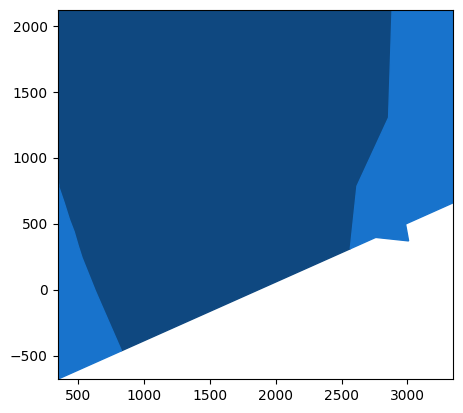

In [51]:
color = 'dodgerblue'
for depth in depths_lands_inside:
    polygon = patches.Polygon([(x[0], x[1]) for x in depth[0].exterior.coords], fill=True, color=modulate_color(color, 1- depth[1]/100))
    plt.gca().add_patch(polygon)


# get the limits of the polygons
x_min = min([x[0] for depth in depths_lands_inside for x in depth[0].exterior.coords])
x_max = max([x[0] for depth in depths_lands_inside for x in depth[0].exterior.coords])
y_min = min([x[1] for depth in depths_lands_inside for x in depth[0].exterior.coords])
y_max = max([x[1] for depth in depths_lands_inside for x in depth[0].exterior.coords])

# Set the axes limits to fit the plot
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.gca().set_aspect('equal', adjustable='box')

plt.show()

In [53]:



x = 0
y = 0

for i in range(20):
    x += 1
    y += 1
    if x > 10:
        x = 0
    print(x, y)



1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
0 11
1 12
2 13
3 14
4 15
5 16
6 17
7 18
8 19
9 20


In [61]:



        # canvas = pygame.Surface(self.window_size_total)
        # canvas.fill((77, 77, 77))  # RGB for black

        # # Blitcenario surface onto the left side of the new one
        # canvas.blit(canvas_scenario, (self.padding, self.padding))

        # Blitanel surface onto the right side of the new one

        # Blit the observation matrix onto the panel
        #observation_surface = self._render_observartion_matrix()

        # observation_matrix = self.observation_matrix

        # indices = (observation_matrix * 255 / 100).astype(int)
        # color_map_array = np.array(self.color_map)
        # observation_matrix_rgb = color_map_array[indices.ravel()].reshape(observation_matrix.shape + (3,))

        # # scale to the window_observation_size while keeping the aspect ratio
        # # calculate the aspect ratio of the observation matrix
        # aspect_ratio = observation_matrix.shape[1] / observation_matrix.shape[0]
        # if aspect_ratio > 1:
        #     # Observation matrix is wider than it is tall
        #     width = self.window_observation_size[0] -50
        #     height = int(self.window_observation_size[1] / aspect_ratio)
        # else:
        #     # Observation matrix is taller than it is wide
        #     width = int(self.window_observation_size[0] * aspect_ratio)
        #     height = self.window_observation_size[1] - 50 

        # observation_matrix_rgb = cv2.resize(observation_matrix_rgb, (width, height))

        # observation_surface = pygame.surfarray.make_surface(observation_matrix_rgb)

        # canvas_panel = pygame.Surface(self.window_observation_size)
        # canvas_panel.fill((0, 0, 0))  


        # original_width, original_height = canvas_panel.get_size()

        # # Calculate the position to blit the original surface onto the new one
        # position = ((self.window_observation_size[0] - original_width) // 2, (self.window_observation_size[1] - original_height) // 2)

        # canvas_panel.blit(observation_surface, position)


        # canvas.blit(canvas_panel, (2 * self.padding + self.window_scenario_size[0], self.padding))

,nombre,edad,peso
1,Juan,50,68
2,Marcos,88,79
